In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

today_date=dt.datetime(2014,12,31)


In [2]:
df=pd.read_csv("marketing_campaign.csv",sep="\t")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
df["Dt_Customer"].max()


Timestamp('2014-06-29 00:00:00')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
type(today_date)

datetime.datetime

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
df["Income"].describe()

count     2216.0000
mean     52247.2514
std      25173.0767
min       1730.0000
25%      35303.0000
50%      51381.5000
75%      68522.0000
max     666666.0000
Name: Income, dtype: float64

In [9]:
def outlier_thresholds(dataframe,variable):
        q1=dataframe[variable].quantile(0.25)
        q3=dataframe[variable].quantile(0.75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        return lower,upper



In [10]:
outlier_thresholds(df,"Income")

(np.float64(-14525.5), np.float64(118350.5))

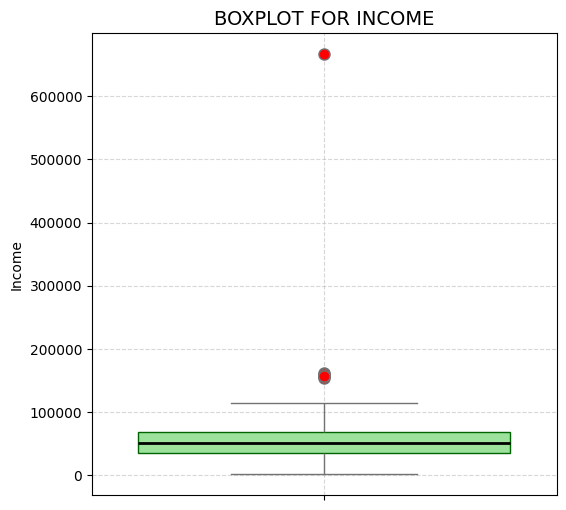

In [11]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df["Income"], 
            fliersize=8,   
            linewidth=1,   
            color="lightgreen",
            boxprops=dict(edgecolor='darkgreen'),     
            medianprops=dict(color="black", linewidth=2), 
            flierprops=dict(marker='o', color='red', markersize=8, markerfacecolor='red'))  # aykırı değer işaretleri

plt.title("BOXPLOT FOR INCOME", fontsize=14)
plt.ylabel("Income")
plt.grid(True, linestyle='--', alpha=0.5)

In [12]:
def check_outliers(dataframe,variable):
    lower,upper=outlier_thresholds(dataframe,variable)
    if dataframe[(dataframe[variable]<lower)|(dataframe[variable]>upper)].any(axis=None):
        return len(dataframe[(dataframe[variable] < lower) | (dataframe[variable] > upper)])
    else:
        return False
    

In [13]:
check_outliers(df,"Income")

C:\Users\casper\AppData\Local\Temp\ipykernel_2632\4249715518.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[variable]<lower)|(dataframe[variable]>upper)].any(axis=None):


8

In [14]:
def replace_wth_thresholds(dataframe,variable,inplace=True):
    lower,upper=outlier_thresholds(dataframe,variable)
    dataframe.loc[(dataframe[variable]<lower,variable)]=round(lower,0)
    dataframe.loc[(dataframe[variable]>upper,variable)]=round(upper,0)

    

In [15]:
replace_wth_thresholds(df,"Income")

In [16]:
df["Income"].describe()


count     2216.0000
mean     51874.4914
std      21059.7352
min       1730.0000
25%      35303.0000
50%      51381.5000
75%      68522.0000
max     118350.0000
Name: Income, dtype: float64

<Axes: ylabel='Income'>

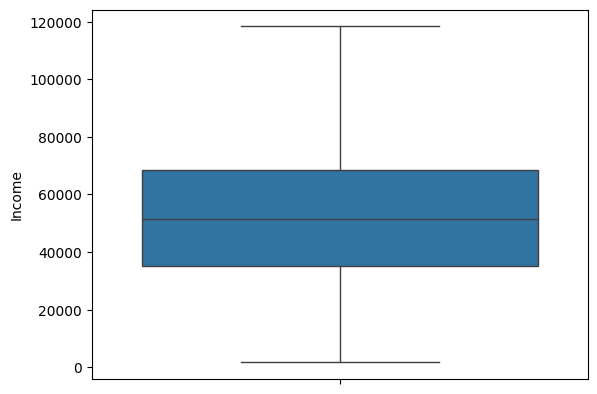

In [17]:
sns.boxplot(y=df["Income"])

In [18]:
check_outliers(df,"Income")

C:\Users\casper\AppData\Local\Temp\ipykernel_2632\4249715518.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[variable]<lower)|(dataframe[variable]>upper)].any(axis=None):


False

In [19]:
df["Income_Cat"]=pd.qcut(df["Income"],4,labels=["Q1","Q2","Q3","Q4"])

In [20]:
df.shape

(2240, 30)

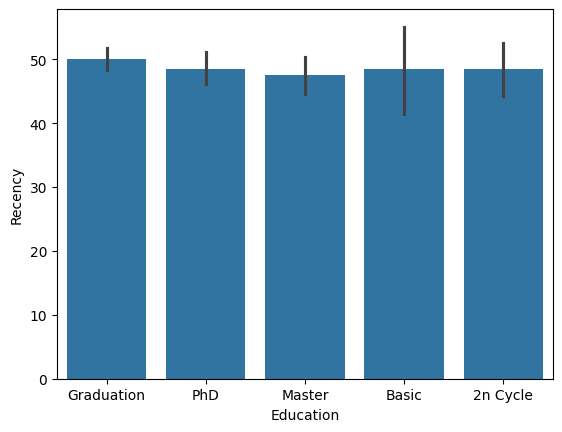

In [21]:
sns.barplot(x="Education", y="Recency", data=df)
plt.show()

In [22]:
df["Age"]=today_date.year-df["Year_Birth"]

In [23]:
df["Age"].shape[0]

2240

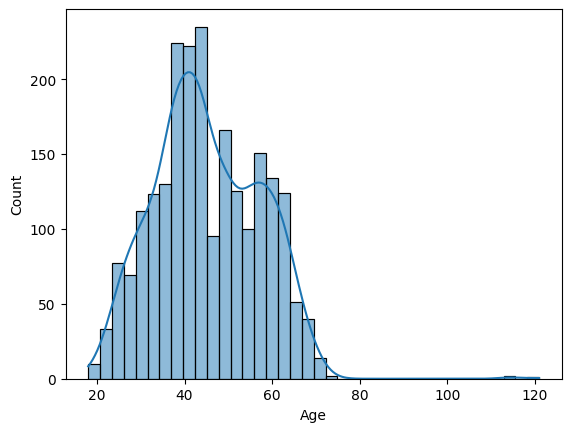

In [24]:
sns.histplot(df['Age'], kde=True)
plt.show()

In [25]:
df["Age"].describe()

count   2240.0000
mean      45.1942
std       11.9841
min       18.0000
25%       37.0000
50%       44.0000
75%       55.0000
max      121.0000
Name: Age, dtype: float64

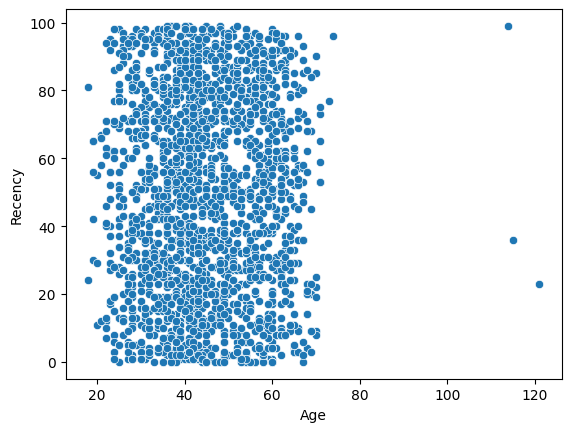

In [26]:
sns.scatterplot(data=df,x="Age",y="Recency")
plt.show()

In [27]:
df["TotalChildren"]=df["Teenhome"]+df["Kidhome"]

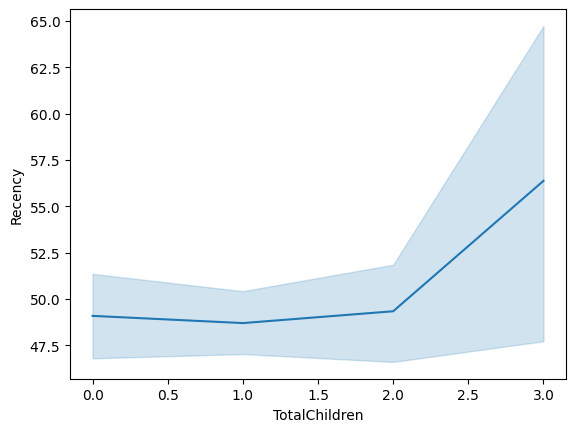

In [28]:
sns.lineplot(data=df,x="TotalChildren",y="Recency")
plt.show()

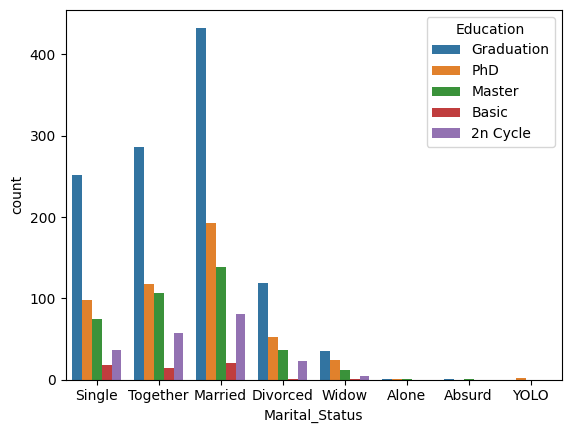

In [29]:
sns.countplot(data=df,x="Marital_Status",hue="Education")
plt.show()


In [30]:
df["Tenure"]=((today_date-df["Dt_Customer"]).dt.days/7).astype(int)

In [31]:
df.head()
df["Tenure"]

0       121
1        42
2        71
3        46
4        49
       ... 
2235     80
2236     29
2237     48
2238     48
2239    115
Name: Tenure, Length: 2240, dtype: int64

In [32]:
df["Age"].max()

np.int64(121)

In [33]:
df["Age_Cat"]=pd.cut(df["Age"],bins=[25,35,45,55,65,75,128],labels=["YoungAdults","Adults","Middle Ages","UpperMiddleAge","OlderAge","Seniors"])

In [34]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Cat,Age,TotalChildren,Tenure,Age_Cat
0,5524,1957,Graduation,Single,58138.0000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,Q3,57,0,121,UpperMiddleAge
1,2174,1954,Graduation,Single,46344.0000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,Q2,60,2,42,UpperMiddleAge
2,4141,1965,Graduation,Together,71613.0000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,Q4,49,0,71,Middle Ages
3,6182,1984,Graduation,Together,26646.0000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Q1,30,1,46,YoungAdults
4,5324,1981,PhD,Married,58293.0000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,Q3,33,1,49,YoungAdults
5,7446,1967,Master,Together,62513.0000,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,Q3,47,1,68,Middle Ages
6,965,1971,Graduation,Divorced,55635.0000,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,Q3,43,1,111,Adults
7,6177,1985,PhD,Married,33454.0000,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,Q1,29,1,86,YoungAdults
8,4855,1974,PhD,Together,30351.0000,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,Q1,40,1,81,Adults
9,5899,1950,PhD,Together,5648.0000,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,Q1,64,2,41,UpperMiddleAge


C:\Users\casper\AppData\Local\Temp\ipykernel_2632\2576372965.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Cat")["Complain"]


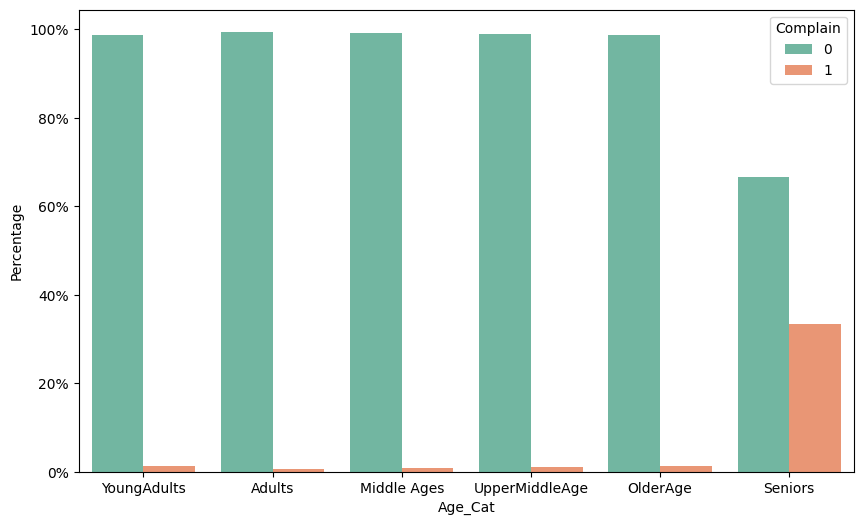

In [35]:
import matplotlib.ticker as mtick
df_percent = (
    df.groupby("Age_Cat")["Complain"]
    .value_counts(normalize=True)
    .rename("Percentage")
    .reset_index()
)
plt.figure(figsize=(10,6))
sns.barplot(data=df_percent, x="Age_Cat", y="Percentage", hue="Complain", palette="Set2")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

In [36]:
df.pivot_table(index="Age_Cat",columns=None,values=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"],aggfunc="mean",margins=True)

C:\Users\casper\AppData\Local\Temp\ipykernel_2632\3379068554.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index="Age_Cat",columns=None,values=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"],aggfunc="mean",margins=True)


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Age_Cat,,,,,
YoungAdults,0.0674,0.0078,0.1036,0.0492,0.0959
Adults,0.0515,0.0132,0.0778,0.0660,0.0554
Middle Ages,0.0535,0.0165,0.0473,0.0885,0.0535
UpperMiddleAge,0.0752,0.0159,0.0592,0.0957,0.0683
OlderAge,0.1169,0.0000,0.0779,0.0909,0.1688
Seniors,0.0000,0.0000,0.0000,0.0000,0.3333
All,0.0619,0.0130,0.0717,0.0749,0.0693


In [37]:
df.pivot_table(index="Age_Cat",columns=None,values=["MntWines","MntGoldProds","MntFishProducts","MntFruits","MntSweetProducts","MntMeatProducts"],aggfunc="sum",margins=True)

C:\Users\casper\AppData\Local\Temp\ipykernel_2632\3594038603.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index="Age_Cat",columns=None,values=["MntWines","MntGoldProds","MntFishProducts","MntFruits","MntSweetProducts","MntMeatProducts"],aggfunc="sum",margins=True)


,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Age_Cat,,,,,,
YoungAdults,14784,10929,15606,64040,10952,89313
Adults,24992,17216,29727,111621,18667,204311
Middle Ages,17276,13499,22183,75487,12717,163548
UpperMiddleAge,17887,10702,22369,78955,12134,158662
OlderAge,4707,3337,3778,21273,3298,37648
Seniors,118,150,251,575,68,778
All,79764,55833,93914,351951,57836,654260


In [38]:
df.groupby("Age_Cat")["Complain"].value_counts()

C:\Users\casper\AppData\Local\Temp\ipykernel_2632\2696857040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Cat")["Complain"].value_counts()


Age_Cat         Complain
YoungAdults     0           381
                1             5
Adults          0           754
                1             4
Middle Ages     0           482
                1             4
UpperMiddleAge  0           434
                1             5
OlderAge        0            76
                1             1
Seniors         0             2
                1             1
Name: count, dtype: int64

In [39]:
df.groupby("Education")["Complain"].value_counts()

Education   Complain
2n Cycle    0            199
            1              4
Basic       0             54
Graduation  0           1113
            1             14
Master      0            368
            1              2
PhD         0            485
            1              1
Name: count, dtype: int64

In [40]:
df.pivot_table(index="Marital_Status",columns=None,values=["MntWines","MntGoldProds","MntFishProducts","MntFruits","MntSweetProducts","MntMeatProducts"],aggfunc="sum",margins=True)

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Marital_Status,,,,,,
Absurd,411,169,408,625,61,711
Alone,23,12,81,79,21,554
Divorced,8130,6363,10739,34848,6222,75364
Married,30569,22235,36999,138829,23070,258751
Single,18344,12881,20990,87412,13086,138399
Together,22615,14703,24937,97500,15151,177959
Widow,3957,2548,4371,14575,3004,28434
YOLO,8,6,84,100,6,644
All,84057,58917,98609,373968,60621,680816


RFM ANALYSIS

In [41]:
df["Frequency"]=df[["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]].sum(axis=1)

In [42]:
df=df[~((df["Frequency"]==0)&(df["Recency"]>0))]

In [43]:
df["Monetary"]=df[["MntWines","MntGoldProds","MntFishProducts","MntFruits","MntSweetProducts","MntMeatProducts"]].sum(axis=1)

In [44]:
df["Recency_Score"]=pd.cut(df["Recency"],5,labels=[5,4,3,2,1])
df["Frequency_Score"]=pd.cut(df["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
df["Monetary_Score"]=pd.cut(df["Monetary"],5,labels=[1,2,3,4,5])

In [45]:
df["TotalMnt"]=df["MntWines"]+df["MntGoldProds"]+df["MntFishProducts"]+df["MntFruits"]+df["MntSweetProducts"]+df["MntMeatProducts"]

In [46]:
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2238 non-null   int64         
 1   Year_Birth           2238 non-null   int64         
 2   Education            2238 non-null   object        
 3   Marital_Status       2238 non-null   object        
 4   Income               2214 non-null   float64       
 5   Kidhome              2238 non-null   int64         
 6   Teenhome             2238 non-null   int64         
 7   Dt_Customer          2238 non-null   datetime64[ns]
 8   Recency              2238 non-null   int64         
 9   MntWines             2238 non-null   int64         
 10  MntFruits            2238 non-null   int64         
 11  MntMeatProducts      2238 non-null   int64         
 12  MntFishProducts      2238 non-null   int64         
 13  MntSweetProducts     2238 non-null   i

In [47]:
df["RF_Score"]=(df["Recency_Score"].astype(str))+(df["Frequency_Score"].astype(str))

In [48]:
seg_map={r'[1-2][1-2]':"hibernating",
        r'[1-2][3-4]':"at_Risk",
        r'[1-2]5':"cant_loose",
        r'3[1-2]':"about_to_sleep",
        r'33':"need_attention",
        r'[3-4][4-5]':"loyal_customers",
        r'41':"promising",
        r'51':"new_customers",
        r'[4-5][2-3]':"potential_loyalists",
        r'5[4-5]':"champions"}
df["Segment"]=df["RF_Score"].replace(seg_map,regex=True)

In [49]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Cat,Age,TotalChildren,Tenure,Age_Cat,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,TotalMnt,RF_Score,Segment
0,5524,1957,Graduation,Single,58138.0000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,Q3,57,0,121,UpperMiddleAge,29,1617,3,5,4,1617,35,loyal_customers
1,2174,1954,Graduation,Single,46344.0000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,Q2,60,2,42,UpperMiddleAge,9,27,4,1,1,27,41,promising
2,4141,1965,Graduation,Together,71613.0000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,Q4,49,0,71,Middle Ages,24,776,4,4,2,776,44,loyal_customers
3,6182,1984,Graduation,Together,26646.0000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Q1,30,1,46,YoungAdults,12,53,4,2,1,53,42,potential_loyalists
4,5324,1981,PhD,Married,58293.0000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,Q3,33,1,49,YoungAdults,19,422,1,3,1,422,13,at_Risk
5,7446,1967,Master,Together,62513.0000,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,Q3,47,1,68,Middle Ages,26,716,5,5,2,716,55,champions
6,965,1971,Graduation,Divorced,55635.0000,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,Q3,43,1,111,Adults,23,590,4,4,2,590,44,loyal_customers
7,6177,1985,PhD,Married,33454.0000,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,Q1,29,1,86,YoungAdults,16,169,4,3,1,169,43,potential_loyalists
8,4855,1974,PhD,Together,30351.0000,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,Q1,40,1,81,Adults,14,46,5,2,1,46,52,potential_loyalists
9,5899,1950,PhD,Together,5648.0000,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,Q1,64,2,41,UpperMiddleAge,21,49,2,4,1,49,24,at_Risk


In [50]:
df["Segment"].value_counts()

Segment
loyal_customers        360
at_Risk                358
hibernating            349
potential_loyalists    348
about_to_sleep         190
champions              180
cant_loose             175
new_customers          100
promising               96
need_attention          82
Name: count, dtype: int64

In [51]:
df.pivot_table(index="Age_Cat", columns="Segment", aggfunc="size", fill_value=0)


C:\Users\casper\AppData\Local\Temp\ipykernel_2632\1502801834.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index="Age_Cat", columns="Segment", aggfunc="size", fill_value=0)


Segment,about_to_sleep,at_Risk,cant_loose,champions,hibernating,loyal_customers,need_attention,new_customers,potential_loyalists,promising
Age_Cat,,,,,,,,,,
YoungAdults,39,58,18,26,79,44,11,20,76,15
Adults,68,106,59,58,118,112,28,41,125,42
Middle Ages,39,83,39,38,81,92,12,18,70,14
UpperMiddleAge,30,81,49,41,51,75,23,14,55,19
OlderAge,5,13,6,10,6,20,7,2,7,1
Seniors,0,0,0,0,1,0,0,0,1,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, 0 to 2239
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2238 non-null   int64         
 1   Year_Birth           2238 non-null   int64         
 2   Education            2238 non-null   object        
 3   Marital_Status       2238 non-null   object        
 4   Income               2214 non-null   float64       
 5   Kidhome              2238 non-null   int64         
 6   Teenhome             2238 non-null   int64         
 7   Dt_Customer          2238 non-null   datetime64[ns]
 8   Recency              2238 non-null   int64         
 9   MntWines             2238 non-null   int64         
 10  MntFruits            2238 non-null   int64         
 11  MntMeatProducts      2238 non-null   int64         
 12  MntFishProducts      2238 non-null   int64         
 13  MntSweetProducts     2238 non-null   i

In [53]:
campaigns=df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]]
df["Total_Acceptance"]=df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]+df["Response"]

<Axes: >

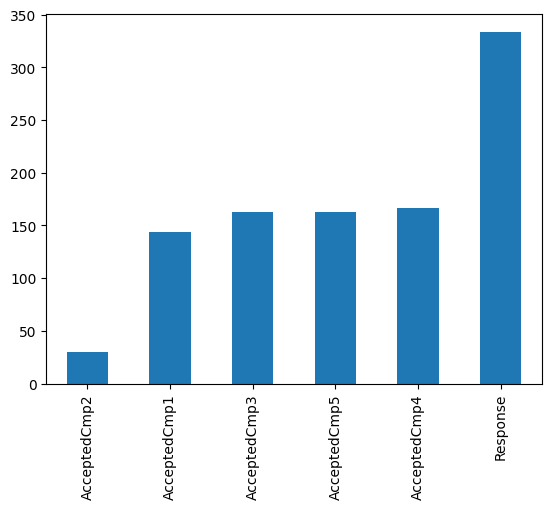

In [54]:
campaigns.sum().sort_values().plot(kind="bar")

In [55]:
df.groupby("Education")["Total_Acceptance"].mean().sort_values(ascending=False)
df.groupby("Marital_Status")["Total_Acceptance"].mean().sort_values(ascending=False)
df.groupby("Age_Cat")["Total_Acceptance"].mean().sort_values(ascending=False)


C:\Users\casper\AppData\Local\Temp\ipykernel_2632\1085034362.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Cat")["Total_Acceptance"].mean().sort_values(ascending=False)


Age_Cat
OlderAge         0.6494
YoungAdults      0.5104
UpperMiddleAge   0.4612
Adults           0.4082
Middle Ages      0.3807
Seniors          0.3333
Name: Total_Acceptance, dtype: float64

In [56]:
df["Total_Acceptance"].corr(df["TotalMnt"])

np.float64(0.45601295404535774)

In [57]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Income_Cat', 'Age', 'TotalChildren',
       'Tenure', 'Age_Cat', 'Frequency', 'Monetary', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'TotalMnt', 'RF_Score', 'Segment', 'Total_Acceptance'],
      dtype='object')

<Axes: >

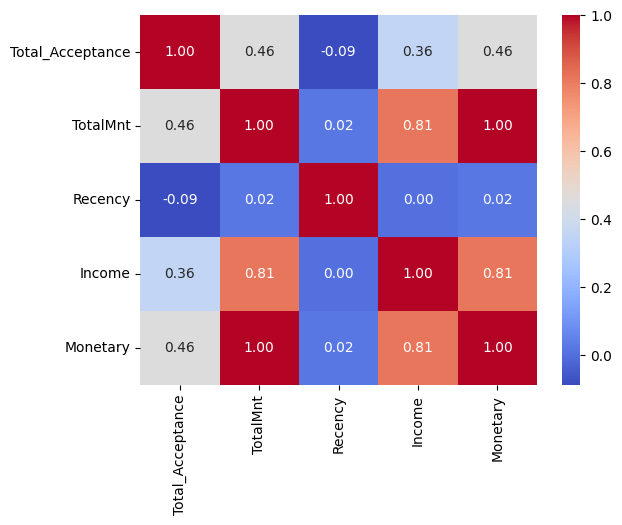

In [58]:
sns.heatmap(df[["Total_Acceptance", "TotalMnt", "Recency", "Income", "Monetary"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")


In [59]:
df.groupby("Segment")["Total_Acceptance"].sum().sort_values(ascending=False)

Segment
loyal_customers        264
at_Risk                174
champions              159
potential_loyalists    142
cant_loose             138
hibernating             35
about_to_sleep          25
need_attention          25
new_customers           20
promising               19
Name: Total_Acceptance, dtype: int64

In [60]:
df.groupby("Segment")[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Segment,,,,,,
about_to_sleep,0,0,12,4,1,8
at_Risk,28,3,29,37,38,39
cant_loose,26,12,13,31,28,28
champions,21,4,16,26,27,65
hibernating,1,0,14,6,3,11
loyal_customers,53,6,33,45,48,79
need_attention,4,0,4,4,3,10
new_customers,0,0,9,0,0,11
potential_loyalists,11,3,20,14,15,79


CLTV 

In [61]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Income_Cat', 'Age', 'TotalChildren',
       'Tenure', 'Age_Cat', 'Frequency', 'Monetary', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'TotalMnt', 'RF_Score', 'Segment', 'Total_Acceptance'],
      dtype='object')

In [62]:
today_date
df.shape

(2238, 43)

In [63]:
df["Total_Num_Purchases"]=df["NumDealsPurchases"]+df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]

In [64]:
df["Avg_Order_Value"]=df["TotalMnt"]/df["Total_Num_Purchases"]

In [65]:
df["Purch_Freq"]=df["Total_Num_Purchases"]/df.shape[0]

In [66]:
df["Customer_Value"]=df["Avg_Order_Value"]*df["Purch_Freq"]

In [67]:
Repeat_Rate=df[df["Total_Num_Purchases"]>1].shape[0]/df.shape[0]

In [68]:
Churn_Rate=1-Repeat_Rate

In [69]:
Profit_Margin=0.10

In [70]:
Churn_Rate

0.002680965147453085

In [71]:
df["CLTV"]=(df["Customer_Value"]/Churn_Rate)* Profit_Margin
df["CLTV"].isnull().sum()

np.int64(2)

In [72]:
df["CLTV"]=df["CLTV"].fillna(0)
df["CLTV"].isna().sum()

np.int64(0)

In [73]:
outlier_thresholds(df,"CLTV")
replace_wth_thresholds(df,"CLTV")

In [74]:
df.groupby("Segment")["CLTV"].mean().sort_values(ascending=False)

Segment
cant_loose            20.0477
loyal_customers       18.1494
champions             17.4381
at_Risk               14.1132
need_attention        10.4904
potential_loyalists    6.6354
hibernating            1.9352
about_to_sleep         1.8679
new_customers          1.0175
promising              0.8429
Name: CLTV, dtype: float64

In [75]:
df["CLTV_Segment"]=pd.cut(df["CLTV"],4,labels=["Low","Medium","High","Very_High"])

In [76]:
df["CLTV_Segment"].value_counts()

CLTV_Segment
Low          1338
Medium        519
High          301
Very_High      80
Name: count, dtype: int64

Text(0.5, 1.0, 'CLTV_SEGMENT DISTRIBUTION')

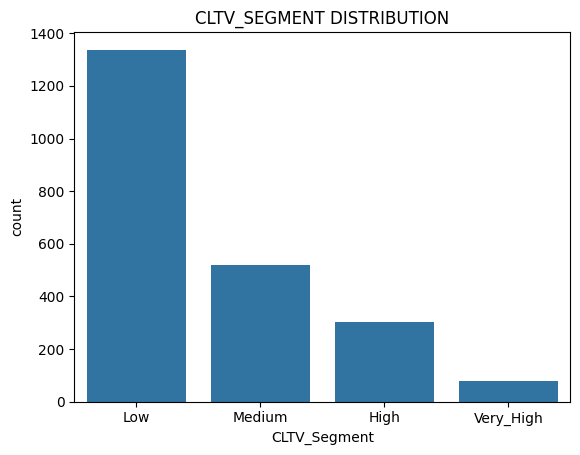

In [77]:
sns.countplot(data=df,x="CLTV_Segment")
plt.title("CLTV_SEGMENT DISTRIBUTION")

In [78]:
df.groupby("Segment")["CLTV_Segment"].value_counts()
df.info()
df["Segment_Combined"]=df["Segment"] +"_"+ df["CLTV_Segment"].astype("string")

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, 0 to 2239
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2238 non-null   int64         
 1   Year_Birth           2238 non-null   int64         
 2   Education            2238 non-null   object        
 3   Marital_Status       2238 non-null   object        
 4   Income               2214 non-null   float64       
 5   Kidhome              2238 non-null   int64         
 6   Teenhome             2238 non-null   int64         
 7   Dt_Customer          2238 non-null   datetime64[ns]
 8   Recency              2238 non-null   int64         
 9   MntWines             2238 non-null   int64         
 10  MntFruits            2238 non-null   int64         
 11  MntMeatProducts      2238 non-null   int64         
 12  MntFishProducts      2238 non-null   int64         
 13  MntSweetProducts     2238 non-null   i

In [79]:
df.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Cat,Age,TotalChildren,Tenure,Age_Cat,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,TotalMnt,RF_Score,Segment,Total_Acceptance,Total_Num_Purchases,Avg_Order_Value,Purch_Freq,Customer_Value,CLTV,CLTV_Segment,Segment_Combined
0,5524,1957,Graduation,Single,58138.0000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,Q3,57,0,121,UpperMiddleAge,29,1617,3,5,4,1617,35,loyal_customers,1,25,64.6800,0.0112,0.7225,26.9500,High,loyal_customers_High
1,2174,1954,Graduation,Single,46344.0000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,Q2,60,2,42,UpperMiddleAge,9,27,4,1,1,27,41,promising,0,6,4.5000,0.0027,0.0121,0.4500,Low,promising_Low
2,4141,1965,Graduation,Together,71613.0000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,Q4,49,0,71,Middle Ages,24,776,4,4,2,776,44,loyal_customers,0,21,36.9524,0.0094,0.3467,12.9333,Medium,loyal_customers_Medium
3,6182,1984,Graduation,Together,26646.0000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Q1,30,1,46,YoungAdults,12,53,4,2,1,53,42,potential_loyalists,0,8,6.6250,0.0036,0.0237,0.8833,Low,potential_loyalists_Low
4,5324,1981,PhD,Married,58293.0000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,Q3,33,1,49,YoungAdults,19,422,1,3,1,422,13,at_Risk,0,19,22.2105,0.0085,0.1886,7.0333,Low,at_Risk_Low
5,7446,1967,Master,Together,62513.0000,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,Q3,47,1,68,Middle Ages,26,716,5,5,2,716,55,champions,0,22,32.5455,0.0098,0.3199,11.9333,Medium,champions_Medium
6,965,1971,Graduation,Divorced,55635.0000,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,Q3,43,1,111,Adults,23,590,4,4,2,590,44,loyal_customers,0,21,28.0952,0.0094,0.2636,9.8333,Low,loyal_customers_Low
7,6177,1985,PhD,Married,33454.0000,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,Q1,29,1,86,YoungAdults,16,169,4,3,1,169,43,potential_loyalists,0,10,16.9000,0.0045,0.0755,2.8167,Low,potential_loyalists_Low
8,4855,1974,PhD,Together,30351.0000,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,Q1,40,1,81,Adults,14,46,5,2,1,46,52,potential_loyalists,1,6,7.6667,0.0027,0.0206,0.7667,Low,potential_loyalists_Low
9,5899,1950,PhD,Together,5648.0000,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,Q1,64,2,41,UpperMiddleAge,21,49,2,4,1,49,24,at_Risk,1,2,24.5000,0.0009,0.0219,0.8167,Low,at_Risk_Low


In [80]:
df["Segment_Combined"].value_counts().sort_values(ascending=False)

Segment_Combined
hibernating_Low                  336
potential_loyalists_Low          283
about_to_sleep_Low               182
at_Risk_Low                      171
loyal_customers_Medium           165
cant_loose_Medium                102
new_customers_Low                 99
loyal_customers_High              97
promising_Low                     95
at_Risk_Medium                    95
champions_Medium                  85
loyal_customers_Low               73
at_Risk_High                      70
need_attention_Low                54
cant_loose_High                   54
champions_High                    44
champions_Low                     39
potential_loyalists_Medium        36
loyal_customers_Very_High         25
potential_loyalists_High          24
at_Risk_Very_High                 22
need_attention_Medium             18
cant_loose_Very_High              13
champions_Very_High               12
hibernating_Medium                10
need_attention_High                8
about_to_sleep_Medium

In [81]:
df.groupby(["Segment_Combined","Education"]).size().sort_values(ascending=False)

Segment_Combined               Education 
hibernating_Low                Graduation    173
potential_loyalists_Low        Graduation    150
about_to_sleep_Low             Graduation     84
loyal_customers_Medium         Graduation     82
at_Risk_Low                    Graduation     79
                                            ... 
need_attention_Very_High       PhD             1
new_customers_High             Graduation      1
need_attention_Very_High       Master          1
potential_loyalists_Very_High  PhD             1
promising_Medium               Master          1
Length: 118, dtype: int64

In [82]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Income_Cat', 'Age', 'TotalChildren',
       'Tenure', 'Age_Cat', 'Frequency', 'Monetary', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'TotalMnt', 'RF_Score', 'Segment', 'Total_Acceptance', 'Total_Num_Purchases', 'Avg_Order_Value', 'Purch_Freq', 'Customer_Value', 'CLTV', 'CLTV_Segment', 'Segment_Combined'],
      dtype='object')

In [83]:
df.groupby(["Total_Acceptance","Segment_Combined"]).size().unstack(fill_value=0)

Segment_Combined,about_to_sleep_High,about_to_sleep_Low,about_to_sleep_Medium,at_Risk_High,at_Risk_Low,at_Risk_Medium,at_Risk_Very_High,cant_loose_High,cant_loose_Low,cant_loose_Medium,cant_loose_Very_High,champions_High,champions_Low,champions_Medium,champions_Very_High,hibernating_High,hibernating_Low,hibernating_Medium,hibernating_Very_High,loyal_customers_High,loyal_customers_Low,loyal_customers_Medium,loyal_customers_Very_High,need_attention_High,need_attention_Low,need_attention_Medium,need_attention_Very_High,new_customers_High,new_customers_Low,potential_loyalists_High,potential_loyalists_Low,potential_loyalists_Medium,potential_loyalists_Very_High,promising_Low,promising_Medium
Total_Acceptance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,164,6,33,139,70,5,26,4,75,2,17,20,55,2,1,312,7,0,40,48,114,3,4,46,16,1,1,85,5,220,24,1,82,1
1,1,14,0,14,27,21,10,14,1,14,3,7,13,18,1,1,21,2,0,33,21,34,7,3,6,1,0,0,8,9,49,8,2,7,0
2,0,4,1,15,5,2,3,8,0,8,1,10,4,10,5,0,3,1,0,9,2,10,7,0,1,0,0,0,6,3,13,4,1,6,0
3,0,0,0,4,0,0,1,4,0,3,1,7,1,0,3,0,0,0,1,9,2,3,3,1,1,0,1,0,0,4,1,0,1,0,0
4,0,0,0,4,0,1,3,1,0,2,4,3,1,1,1,0,0,0,0,6,0,3,4,0,0,1,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,1,1,0,2,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, 0 to 2239
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2238 non-null   int64         
 1   Year_Birth           2238 non-null   int64         
 2   Education            2238 non-null   object        
 3   Marital_Status       2238 non-null   object        
 4   Income               2214 non-null   float64       
 5   Kidhome              2238 non-null   int64         
 6   Teenhome             2238 non-null   int64         
 7   Dt_Customer          2238 non-null   datetime64[ns]
 8   Recency              2238 non-null   int64         
 9   MntWines             2238 non-null   int64         
 10  MntFruits            2238 non-null   int64         
 11  MntMeatProducts      2238 non-null   int64         
 12  MntFishProducts      2238 non-null   int64         
 13  MntSweetProducts     2238 non-null   i

In [85]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [86]:
df.pivot_table(
    index="Segment_Combined",
    values=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"],
    aggfunc="sum",
    margins=True,
    margins_name="*TOTAL*"
)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Segment_Combined,,,,,
about_to_sleep_High,0,0,0,1,0
about_to_sleep_Low,0,0,12,2,0
about_to_sleep_Medium,0,0,0,1,1
at_Risk_High,11,2,12,11,22
at_Risk_Low,0,0,12,13,0
at_Risk_Medium,11,1,4,8,5
at_Risk_Very_High,6,0,1,5,11
cant_loose_High,11,5,4,9,11
cant_loose_Low,1,1,0,2,1


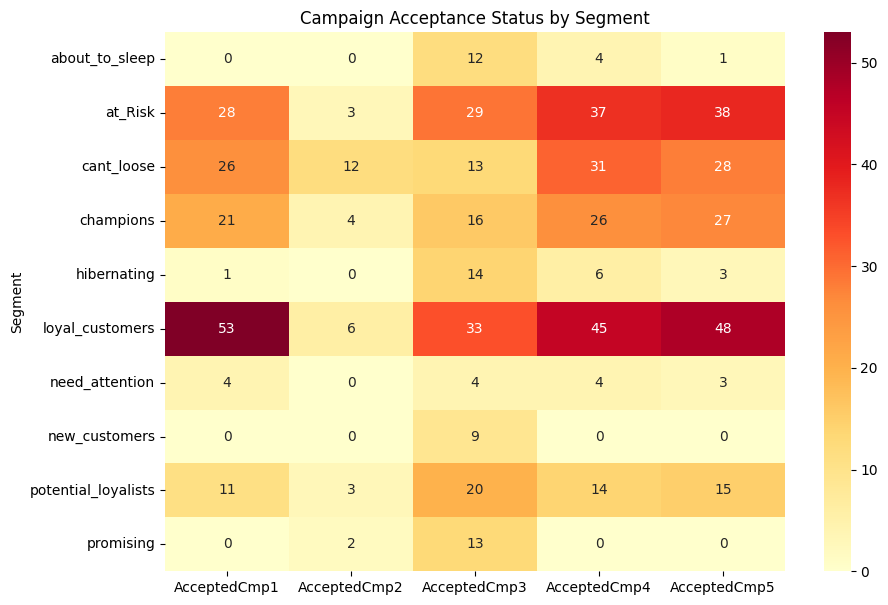

In [87]:
pivot_df = df.pivot_table(
    index='Segment', 
    values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],
    aggfunc='sum'
)

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="YlOrRd", cbar=True)
plt.title('Campaign Acceptance Status by Segment')
plt.show()

In [88]:
pd.pivot_table(data=df,
    index="Segment_Combined",
    columns=["Age_Cat"],
    values=["Income"],
    margins=True,
    aggfunc="sum",
    margins_name="*TOTAL*")

C:\Users\casper\AppData\Local\Temp\ipykernel_2632\4193098109.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=df,


Income                                                                                   
Age_Cat                         YoungAdults        Adults   Middle Ages UpperMiddleAge     OlderAge     Seniors        *TOTAL*
Segment_Combined                                                                                                              
about_to_sleep_High                  0.0000        0.0000        0.0000         0.0000       0.0000      0.0000            NaN
about_to_sleep_Low             1030978.0000  2044390.0000  1403243.0000   1020899.0000  181723.0000      0.0000   5681233.0000
about_to_sleep_Medium           135578.0000        0.0000        0.0000    343229.0000       0.0000      0.0000    478807.0000
at_Risk_High                   1128633.0000  1722856.0000  1073544.0000   1281632.0000   81574.0000      0.0000   5288239.0000
at_Risk_Low                    1253687.0000  2664681.0000  1892045.0000   1414405.0000  269147.0000      0.0000   7493965.0000
at_Risk_Medium                  547269.0000  1188201.0000  1702346.0000   1930930.0000  347702.0000      0.0000   5716448.0000
at_Risk_Very_High               295183.0000   565510.0000   480368.0000    267386.0000   93027.0000      0.0000   1701474.0000
cant_loose_High                 372060.0000   835417.0000   833984.0000   1630491.0000  167627.0000      0.0000   3839579.0000
cant_loose_Low                       0.0000    44325.0000    57808.0000    147431.0000       0.0000      0.0000    249564.0000
cant_loose_Medium               722111.0000  2584461.0000  1440144.0000   1302996.0000  187016.0000      0.0000   6236728.0000
cant_loose_Very_High            180170.0000   423264.0000   244285.0000    146096.0000   82657.0000      0.0000   1076472.0000
champions_High                  849933.0000   646579.0000  1067139.0000    359596.0000   70321.0000      0.0000   2993568.0000
champions_Low                    43974.0000  1002087.0000   317761.0000    560625.0000  113734.0000      0.0000   2038181.0000
champions_Medium                721284.0000  1679517.0000  1070562.0000   1608676.0000  429496.0000      0.0000   5509535.0000
champions_Very_High             247025.0000   402814.0000    72968.0000     78952.0000  172528.0000      0.0000    974287.0000
hibernating_High                     0.0000    76618.0000    85620.0000         0.0000       0.0000      0.0000    162238.0000
hibernating_Low                2149393.0000  3943079.0000  2910844.0000   1953971.0000  203382.0000  36640.0000  11197309.0000
hibernating_Medium              168605.0000   288737.0000    66294.0000     74268.0000   65073.0000      0.0000    662977.0000
hibernating_Very_High                0.0000        0.0000        0.0000         0.0000   77632.0000      0.0000     77632.0000
loyal_customers_High           1142754.0000  2127952.0000  1374530.0000   1358019.0000  635610.0000      0.0000   6638865.0000
loyal_customers_Low             308917.0000  1140613.0000  1251378.0000    975516.0000  128028.0000      0.0000   3804452.0000
loyal_customers_Medium         1067486.0000  3331166.0000  2873684.0000   2328229.0000  504952.0000      0.0000  10105517.0000
loyal_customers_Very_High       397834.0000   580147.0000   437312.0000    267252.0000  170139.0000      0.0000   1852684.0000
need_attention_High             160391.0000   227228.0000   160248.0000         0.0000   62847.0000      0.0000    610714.0000
need_attention_Low              319281.0000   893110.0000   345954.0000    827866.0000   93362.0000      0.0000   2479573.0000
need_attention_Medium           140076.0000   400315.0000    76320.0000    381045.0000  319299.0000      0.0000   1317055.0000
need_attention_Very_High             0.0000        0.0000    81380.0000     80360.0000       0.0000      0.0000    161740.0000
new_customers_High                   0.0000        0.0000    79410.0000         0.0000       0.0000      0.0000     79410.0000
new_customers_Low               537038.0000  1353164.0000   728118.0000    501629.0000   45569.0000 

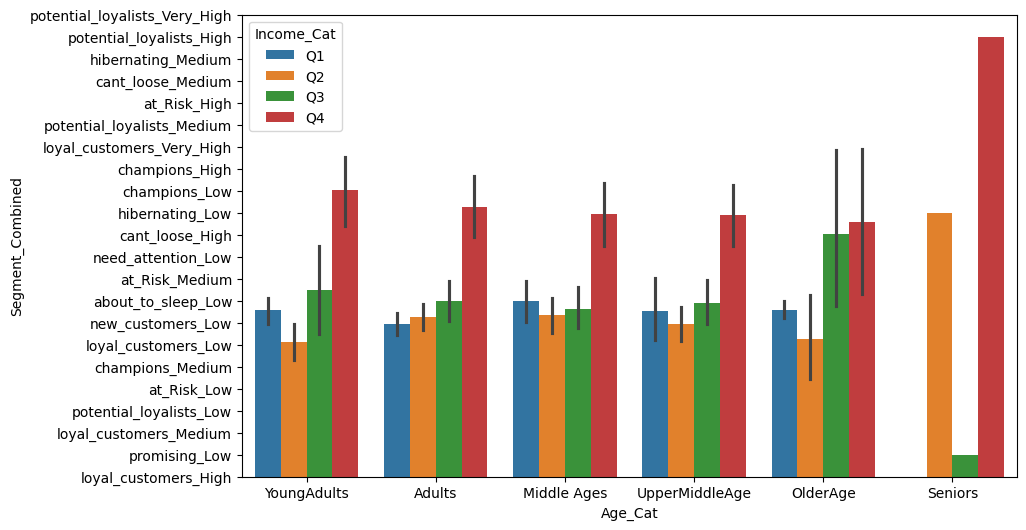

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df,x="Age_Cat",y="Segment_Combined",hue="Income_Cat").invert_yaxis()
plt.show()

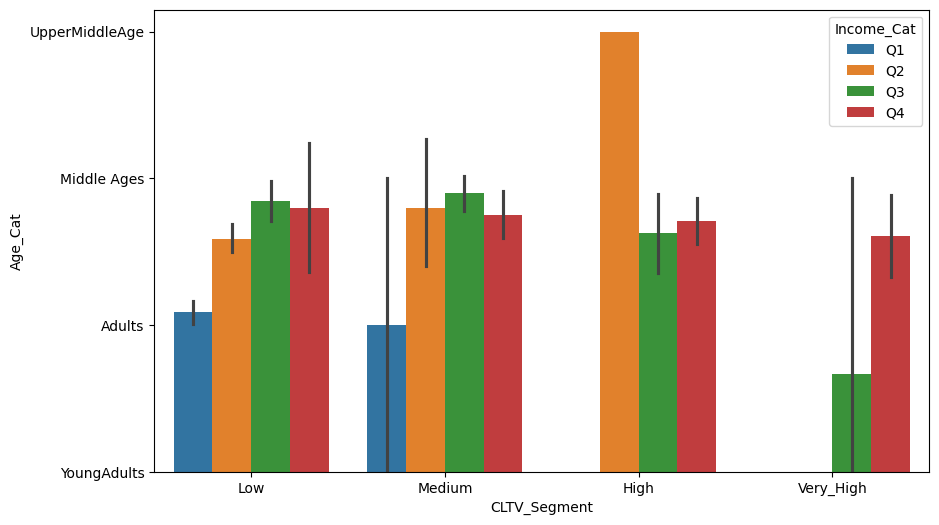

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df,hue="Income_Cat",x="CLTV_Segment",y="Age_Cat").invert_yaxis()
plt.show()


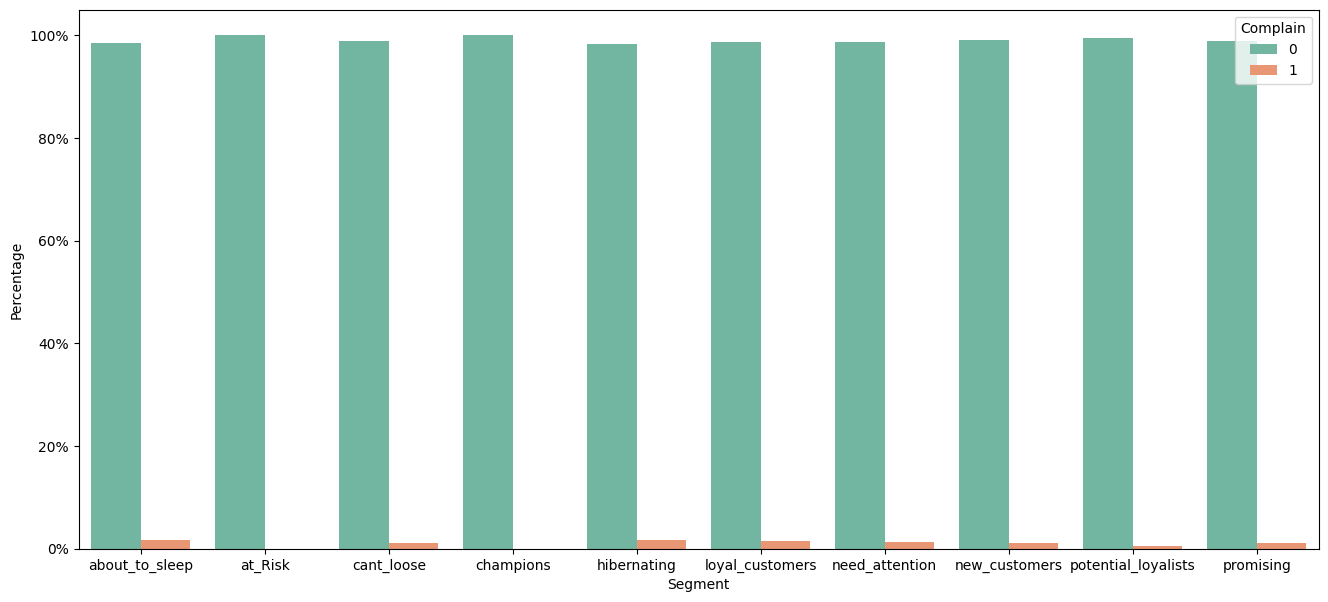

In [91]:
segment_percent = (
    df.groupby("Segment")["Complain"]
    .value_counts(normalize=True)
    .rename("Percentage")
    .reset_index()
)
plt.figure(figsize=(16,7))
sns.barplot(data=segment_percent, x="Segment", y="Percentage", hue="Complain", palette="Set2")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

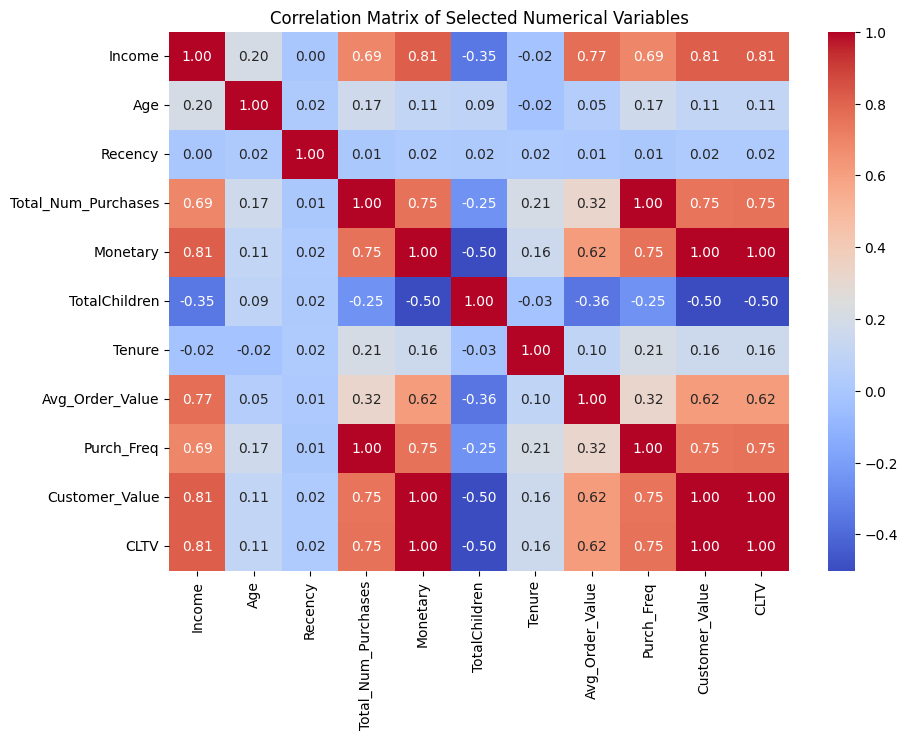

In [92]:
num_columns = ["Income", "Age", "Recency", "Total_Num_Purchases", "Monetary", 
               "TotalChildren", "Tenure", "Avg_Order_Value", "Purch_Freq", 
               "Customer_Value", "CLTV"]

correlation_matrix = df[num_columns].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Selected Numerical Variables")
plt.show()

CLTV ESTIMATION WITH BG NBD AND GAMMA-GAMMA

In [93]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler


In [94]:
cltv_df=pd.DataFrame({"ID":df["ID"],
                      "Recency":df["Recency"]/7,
                      "Frequency":df["Frequency"],
                      "T": df["Tenure"],
                      "Monetary":df["Monetary"],
                      "CLTV_first":df["CLTV"],
                      "Segment":df["Segment"]})


In [95]:
cltv_df=cltv_df[(cltv_df["Frequency"]>=6)]
cltv_df=cltv_df[(cltv_df["Recency"]<=12)&(cltv_df["Recency"]>=3)]
cltv_df=cltv_df[(cltv_df["T"]>=40)]
cltv_df = cltv_df[cltv_df["Recency"] < cltv_df["T"]]
cltv_df.shape[0]

cltv_df.describe().T 


,count,mean,std,min,25%,50%,75%,max
ID,1230.0000,5535.3976,3271.4341,0.0000,2706.0000,5373.0000,8457.0000,11188.0000
Recency,1230.0000,7.5570,2.6626,3.0000,5.2857,7.5714,9.8571,12.0000
Frequency,1230.0000,18.3593,6.5476,7.0000,12.0000,18.0000,23.0000,36.0000
T,1230.0000,83.4512,24.5680,40.0000,63.0000,84.0000,104.0000,126.0000
Monetary,1230.0000,631.1057,609.1961,5.0000,76.0000,424.0000,1078.2500,2525.0000
CLTV_first,1230.0000,10.5182,10.1527,0.0000,1.2667,7.0667,17.9708,42.0000


In [96]:
check_outliers(cltv_df,"T")
cltv_df.head()


,ID,Recency,Frequency,T,Monetary,CLTV_first,Segment
0,5524,8.2857,29,121,1617,26.9500,loyal_customers
1,2174,5.4286,9,42,27,0.4500,promising
2,4141,3.7143,24,71,776,12.9333,loyal_customers
3,6182,3.7143,12,46,53,0.8833,potential_loyalists
6,965,4.8571,23,111,590,9.8333,loyal_customers


In [97]:
cltv_df[cltv_df["CLTV_first"]==0].count()


ID            1
Recency       1
Frequency     1
T             1
Monetary      1
CLTV_first    1
Segment       1
dtype: int64

In [98]:
bgf=BetaGeoFitter(penalizer_coef=0.01)

In [99]:
bgf.fit(cltv_df["Frequency"],
       cltv_df["Recency"],
       cltv_df["T"])


<lifetimes.BetaGeoFitter: fitted with 1230 subjects, a: 0.59, alpha: 0.99, b: 3.91, r: 2.74>

WHO ARE THE 10 CUSTOMERS WE EXPECT TO PURCHASE THE MOST IN A MONTH?

In [100]:
bgf.conditional_expected_number_of_purchases_up_to_time(4,cltv_df["Frequency"],
                                                        cltv_df["Recency"],
                                                        cltv_df["T"]).sort_values(ascending=False).head(10)

806    0.0002
1170   0.0000
1112   0.0000
778    0.0000
931    0.0000
1412   0.0000
995    0.0000
696    0.0000
1319   0.0000
169    0.0000
dtype: float64

WHO ARE THE 10 CUSTOMERS WE EXPECT TO PURCHASE THE MOST IN 6 MONTHS?

In [101]:
bgf.conditional_expected_number_of_purchases_up_to_time(24,cltv_df["Frequency"],
                                                        cltv_df["Recency"],
                                                        cltv_df["T"]).sort_values(ascending=False).head(10)


806    0.0010
1170   0.0001
1112   0.0000
778    0.0000
931    0.0000
1412   0.0000
696    0.0000
995    0.0000
1319   0.0000
169    0.0000
dtype: float64

In [102]:
bgf.conditional_expected_number_of_purchases_up_to_time(52,cltv_df["Frequency"],
                                                        cltv_df["Recency"],
                                                        cltv_df["T"]).sort_values(ascending=False).head(10)

806    0.0020
1170   0.0002
1112   0.0001
778    0.0001
931    0.0000
1412   0.0000
696    0.0000
995    0.0000
1319   0.0000
169    0.0000
dtype: float64

WHAT IS THE EXPECTED SALES NUMBER OF THE ENTIRE COMPANY IN 3 MONTHS?

In [103]:
cltv_df["exp_num_sale_3m"]=bgf.predict(4*3,cltv_df["Frequency"],
                                           cltv_df["Recency"],
                                           cltv_df["T"],).sum()
cltv_df.groupby("Segment")["exp_num_sale_3m"].agg(["mean","count","sum"])

,mean,count,sum
Segment,,,
about_to_sleep,0.0007,150,0.1016
at_Risk,0.0007,201,0.1362
cant_loose,0.0007,104,0.0705
hibernating,0.0007,189,0.1280
loyal_customers,0.0007,316,0.2141
need_attention,0.0007,69,0.0467
potential_loyalists,0.0007,144,0.0976
promising,0.0007,57,0.0386


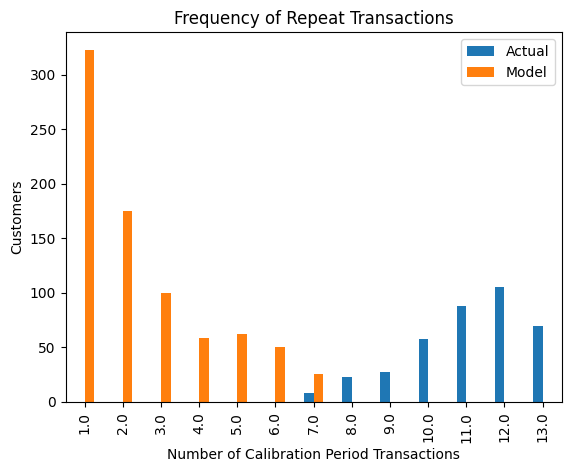

In [104]:
plot_period_transactions(bgf)
plt.show()

Gama-Gama


In [105]:
ggf=GammaGammaFitter(penalizer_coef=0.01)

In [106]:
ggf.fit(cltv_df["Frequency"],cltv_df["Monetary"])

<lifetimes.GammaGammaFitter: fitted with 1230 subjects, p: 3.27, q: 0.31, v: 3.25>

In [107]:
cltv_df["exp_average_profit"]=ggf.conditional_expected_average_profit(cltv_df["Frequency"],cltv_df["Monetary"])
cltv_df.sort_values("exp_average_profit",ascending=False).head(10)


,ID,Recency,Frequency,T,Monetary,CLTV_first,Segment,exp_num_sale_3m,exp_average_profit
1179,5735,4.1429,18,45,2525,42.0000,potential_loyalists,0.0007,2554.9483
1572,5350,4.1429,18,45,2525,42.0000,potential_loyalists,0.0007,2554.9483
1492,1763,8.8571,32,74,2524,42.0000,cant_loose,0.0007,2540.7529
987,4580,6.5714,30,61,2486,41.4333,loyal_customers,0.0007,2503.6101
1052,4475,11.7143,29,97,2440,40.6667,cant_loose,0.0007,2457.8867
1601,5453,3.7143,25,118,2352,39.2000,loyal_customers,0.0007,2372.0283
1288,9010,11.4286,24,98,2346,39.1000,cant_loose,0.0007,2366.8173
1301,6024,8.8571,20,95,2302,38.3667,at_Risk,0.0007,2326.5586
943,5386,8.8571,20,95,2302,38.3667,at_Risk,0.0007,2326.5586
1444,1553,10.1429,26,65,2283,38.0500,cant_loose,0.0007,2301.6906


BG-NBD ve GG Modeli ile CLTV'nin Hesaplanması


In [108]:
cltv=ggf.customer_lifetime_value(bgf,cltv_df["Frequency"],
             cltv_df["Recency"], 
             cltv_df["T"],
             cltv_df["Monetary"],
             time=12,
             freq="W",
             discount_rate=0.1)
cltv.head()


0   0.0000
1   0.0000
2   0.0000
3   0.0000
6   0.0000
Name: clv, dtype: float64

In [109]:
cltv.sort_values(ascending=False).head(10)

806    0.0767
931    0.0020
1170   0.0016
778    0.0015
1112   0.0008
1319   0.0006
169    0.0006
997    0.0006
2138   0.0005
1412   0.0003
Name: clv, dtype: float64

In [110]:
cltv = cltv.to_frame().reset_index()
cltv.columns = ["ID", "CLTV"]


In [111]:
cltv.sort_values(by="CLTV",ascending=False).head()

,ID,CLTV
433,806,0.0767
501,931,0.0020
631,1170,0.0016
415,778,0.0015
595,1112,0.0008


In [112]:
cltv["CLTV_form"]=cltv_df["CLTV_first"]
cltv["CLTV_form"].fillna(0,inplace=True)

In [113]:
cltv.sort_values(by="CLTV",ascending=False).head(30)

,ID,CLTV,CLTV_form
433,806,0.0767,17.8000
501,931,0.0020,0.0000
631,1170,0.0016,0.0000
415,778,0.0015,0.0000
595,1112,0.0008,0.0000
713,1319,0.0006,9.9333
84,169,0.0006,0.0000
542,997,0.0006,6.7667
1173,2138,0.0005,7.3000
759,1412,0.0003,0.0000


<Axes: xlabel='CLTV', ylabel='CLTV_form'>

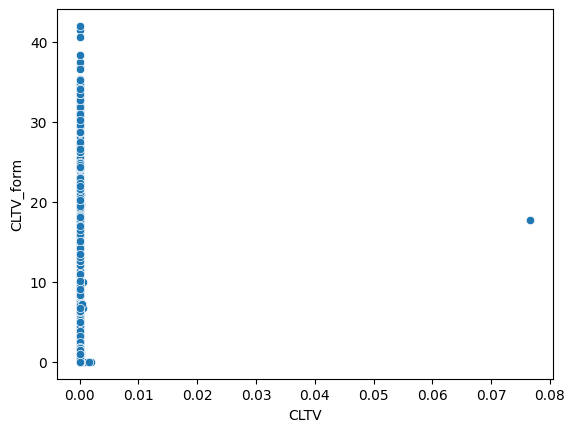

In [114]:
sns.scatterplot(data=cltv,x="CLTV",y="CLTV_form")

In [115]:
cltv["CLTV_form"].describe().T

count   1230.0000
mean       5.9079
std        9.3368
min        0.0000
25%        0.0000
50%        0.5167
75%        9.5375
max       42.0000
Name: CLTV_form, dtype: float64

In [116]:
corr_cltv=cltv[["CLTV", "CLTV_form"]].corr()


In [117]:
cltv["CLTV_form"].isnull().sum()

np.int64(0)

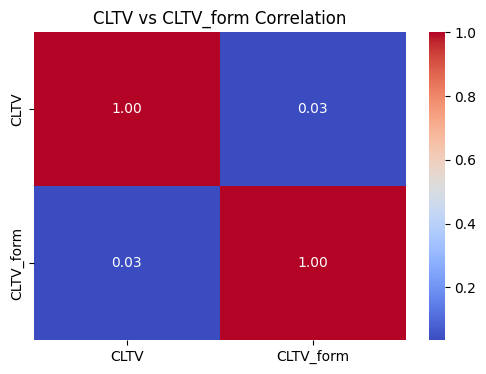

In [118]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_cltv, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("CLTV vs CLTV_form Correlation")
plt.show()